<a href="https://colab.research.google.com/github/ScriptSherpa/AI-and-Ml-journey/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problem Description:
* There is a Human Resource company, which is going to hire a new candidate.
* The candidate has told his previous salary 160K per annum as regional manager, and the HR have to check whether he is telling the truth or bluff.
* So to identify this, they only have a dataset of his previous company in which the salaries of the top 10 positions are mentioned with their levels.
* By checking the dataset available, we have found that there is a non-linear relationship between the Position levels and the salaries.
* Our goal is to build a Bluffing detector regression model, so HR can hire an honest candidate.
* Here we will predict the output for level 6.5 because the candidate has 4+ years' experience as a regional manager, so he must be somewhere between levels 7 and 6.

https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
x = data.Level.values[:,np.newaxis]
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y = data.Salary.values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
lin_reg.fit(x,y)

LinearRegression()

In [7]:
pred_values = lin_reg.predict(x)
pred_values

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

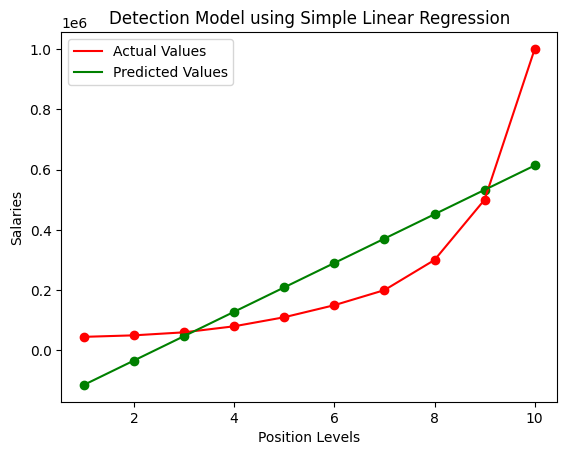

In [8]:
plt.plot(x,y,color='red',label='Actual Values')
plt.scatter(x,y,color='red')

plt.plot(x,pred_values,color='green',label='Predicted Values')
plt.scatter(x,pred_values,color='green')
plt.title('Detection Model using Simple Linear Regression')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In Polynomial Regression we increase the degree of independent variable to achieve more accuracy

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [11]:
poly_reg = PolynomialFeatures(degree=2) # degree=2, then new features are created  1  x*1  x*x
x2 = poly_reg.fit_transform(x)
x2
# degree=3, then new features are created  1  x*1  x*x  x*x*x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [12]:
lin_reg.fit(x2,y)

LinearRegression()

In [13]:
pred_values = lin_reg.predict(x2)
pred_values

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

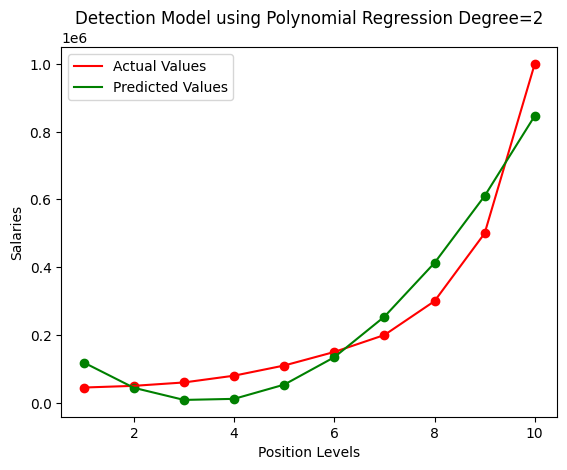

In [14]:
plt.plot(x,y,color='red',label='Actual Values')
plt.scatter(x,y,color='red')

plt.plot(x,pred_values,color='green',label='Predicted Values')
plt.scatter(x,pred_values,color='green')
plt.title('Detection Model using Polynomial Regression Degree=2')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [15]:
poly_reg = PolynomialFeatures(degree=3)
x3 = poly_reg.fit_transform(x)
x3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [16]:
lin_reg.fit(x3,y)

LinearRegression()

In [17]:
pred_values = lin_reg.predict(x3)
pred_values

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622378,
        83270.3962704 , 104820.51282052, 177594.40559441, 326312.35431236,
       575694.63869463, 950461.53846152])

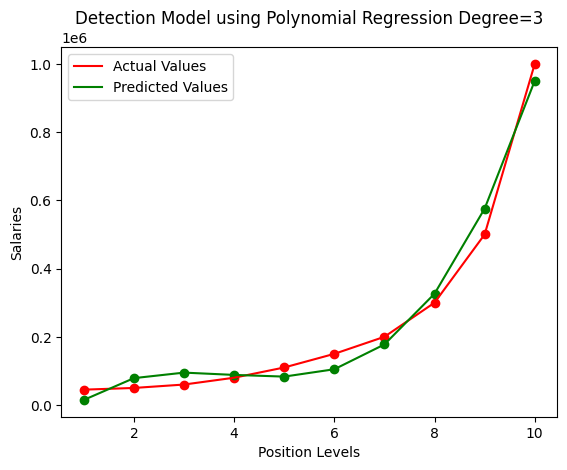

In [18]:
plt.plot(x,y,color='red',label='Actual Values')
plt.scatter(x,y,color='red')

plt.plot(x,pred_values,color='green',label='Predicted Values')
plt.scatter(x,pred_values,color='green')
plt.title('Detection Model using Polynomial Regression Degree=3')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [19]:
poly_reg = PolynomialFeatures(degree=4)
x4 = poly_reg.fit_transform(x)

lin_reg.fit(x4,y)

pred_values = lin_reg.predict(x4)
pred_values

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

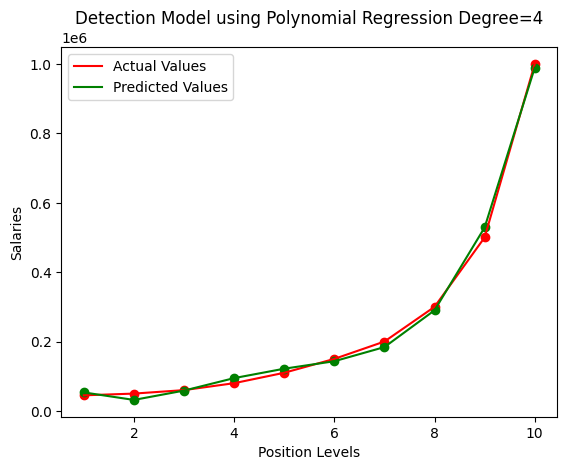

In [20]:
plt.plot(x,y,color='red',label='Actual Values')
plt.scatter(x,y,color='red')

plt.plot(x,pred_values,color='green',label='Predicted Values')
plt.scatter(x,pred_values,color='green')
plt.title('Detection Model using Polynomial Regression Degree=4')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,pred_values)
print('Regression SCore: ', accuracy)
print('Accuracy: ', int(accuracy*100),'%')

Regression SCore:  0.9973922891706614
Accuracy:  99 %


Final Predictions

In [22]:
level = int(input('Enter the previous working level: '))
salary = lin_reg.predict(poly_reg.fit_transform([[level]]))
print('Salary can be',int(salary[0]))

Enter the previous working level: 7
Salary can be 184003
